In [1]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import obspy
import pickle
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import util
import pandas as pd

In [2]:
root = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m5/'
eq_list = os.listdir(root)

In [3]:
window = 2000 
df = pd.DataFrame({'5.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '7.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window),
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)]})
counts = pd.DataFrame({'5.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '7.0':[0, 0, 0, 0, 0, 0, 0, 0]})

aad = pd.DataFrame({'5.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '7.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window),
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)]})

ad = pd.DataFrame({'5.0':[[], [], [], [], [], [], [], []],
                   '5.1':[[], [], [], [], [], [], [], []],
                   '5.2':[[], [], [], [], [], [], [], []],
                   '5.3':[[], [], [], [], [], [], [], []],
                   '5.4':[[], [], [], [], [], [], [], []],
                   '5.5':[[], [], [], [], [], [], [], []],
                   '5.6':[[], [], [], [], [], [], [], []],
                   '5.7':[[], [], [], [], [], [], [], []],
                   '5.8':[[], [], [], [], [], [], [], []],
                   '5.9':[[], [], [], [], [], [], [], []],
                   '6.0':[[], [], [], [], [], [], [], []],
                   '6.1':[[], [], [], [], [], [], [], []],
                   '6.2':[[], [], [], [], [], [], [], []],
                   '6.3':[[], [], [], [], [], [], [], []],
                   '6.4':[[], [], [], [], [], [], [], []],
                   '6.5':[[], [], [], [], [], [], [], []],
                   '6.6':[[], [], [], [], [], [], [], []],
                   '6.7':[[], [], [], [], [], [], [], []],
                   '6.8':[[], [], [], [], [], [], [], []],
                   '6.9':[[], [], [], [], [], [], [], []],
                   '7.0':[[], [], [], [], [], [], [], []]})

In [4]:
client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-06-26"), endtime=UTCDateTime("2020-06-26"), minlongitude=-179, maxlongitude=-145, minlatitude=42, maxlatitude=71, minmagnitude=5, includearrivals=True)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m5_catalog.xml')
dists = []

do_ypcall: clnt_call:  PC: Timed out
do_ypcall: clnt_call: RPC: Timed out
do_ypcall: clnt_call: RPC: Timed out


In [5]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])
        

In [6]:
for eq_name in eq_with_data:
    # find matching cat event:
    for event in cat_with_data:
        if eq_name == util.catEventToFileName(event):
            cat_entry = event
            break
    eq_lat= cat_entry.origins[0].latitude
    eq_long = cat_entry.origins[0].longitude
    eq_mag = cat_entry.magnitudes[0].mag
    eq_mag_str = "{:.1f}".format(eq_mag)

    data = obspy.read(root+eq_name+'/data/*/*')
    data.resample(20)
    inv = obspy.read_inventory(root+eq_name+'/station_xml_files/*')

    with open(root+eq_name+'/picks.pkl', 'rb') as f:
        picks = pickle.load(f)
    n_records = 0
    sampling_rate = 20 # get this from tr.stats.sampling_rate
    # sensor_types = self.data_stats['sensor_types'] for automated OOP
    
    for i in range(0, len(data)):  # iterate through all traces
        tr_name = data[i].stats.network+'.'+data[i].stats.station+'.'+data[i].stats.location
        if data[i].stats.channel[2] == 'Z' and tr_name in picks.keys():  # only use vertical components at stations with a pick
            try:
                tr = data[i].copy()
                tr.remove_response(inv)
                pick = picks[tr_name]
                pick_samples = int(round((UTCDateTime(pick) - tr.stats.starttime)*tr.stats.sampling_rate, 0))
                print(pick_samples)

                sta_lat = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].latitude
                sta_long = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].longitude

                distance = np.sqrt((eq_lat - sta_lat)**2 + (eq_long - sta_long)**2) * 110 # 2D for now...
                if distance < 200: 
                    dists.append(distance)
                    print(distance)
                    tr.filter('bandpass', freqmin=0.1, freqmax = 3) 
                    displ = tr.integrate()
                    abs_displ = abs(displ.data) # find absolute of trace
                    sum_abs_displ = df[eq_mag_str][int(distance//25)]
                    window = int(100 * tr.stats.sampling_rate)
                    sum_abs_displ =  sum_abs_displ + abs_displ[pick_samples:pick_samples+window] # calculate aad for 10000 samples after p wave arrival
                    df[eq_mag_str][int(distance//25)] = sum_abs_displ
                    current = ad[eq_mag_str][int(distance//25)]
                    current.append(abs_displ[pick_samples:pick_samples+window])
                    ad[eq_mag_str][int(distance//25)]= current
                    counts[eq_mag_str][int(distance//25)] = counts[str(np.floor(eq_mag))][int(distance//25)]  + 1
            except:
                continue
            

6292
65.7847377115
6279
49.7824317745
6345
92.7415642848
6272
52.391863729
6160
38.9544976634
6160
47.8328147609
6239
66.8384689429
6316
102.021140835
6100
22.599959216
6346
126.24455109
6295
90.9635002943
6098
25.2988392967
6202
65.5581677754
6337
101.899835889
6295
94.0008296068
6271
83.9030298326
6364
112.722640367
6322
98.2031122216
6286
94.7434655161
6250
60.9048380752
6202
33.7074248932
6258
76.7934336386
6980
98.2817100933
6291
155.298366199
6284
168.989818039
6284
163.871191126
6276
137.407718633
6210
138.425528401
6255
18.8452520753
6260
20.2204925014
6201
65.3303506032
6247
69.6293323868
6251
79.7665213508
6249
97.1523649223
6189
67.9263492327
6350
101.376154162
6296
96.4322608999
6375
118.381010803
6080
38.1156539626
6191
60.2332198847
6279
97.6656332408
6241
97.025436155
6318
122.17642312
6080
40.9739014618
6177
61.1215540745
6345
94.7882370961
6320
96.159543303
6288
123.586766254
6295
131.854938918
6288
128.594759364
6297
132.077804362
6303
139.990638144
6301
134.495052697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6286
85.1963760615
6153
47.3126220696
6080
25.8348817218
6191
56.5936722893
6302
86.7766199854
6160
45.2860913757
6080
27.3365422605
6208
60.5781605534


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6006
8.98465482253
6394
133.851638593
6345
110.159424622
6298
102.79929868
6314
101.681151788
6469
130.256876567


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6555
126.484968803
6186
73.8550496045
6392
118.630094011
6183
57.7004808645
6251
52.8745113831
6319
113.434808101
6243
87.8844199731
6182
54.0677392999
6370
88.2297895186
6080
28.0465164504
6208
44.3983833602
6208
44.3821316335
6345
73.5469270148
6307
73.5296191001
6304
76.8265932409
6123
49.4362900404
6060
23.5206297711
6298
107.69766198
6140
55.5231730935
6115
37.427064766
6080
35.2858124992
6357
103.459192313
6172
64.3209656722
6336
83.7732420108
6283
33.3939356246
6215
81.8964627136
5696
186.270177178
6273
161.241929824
6060
25.1010479662
6317
122.60042332
6338
56.1076490619
6413
70.2707901442
6387
86.77073719
6436
104.171491947
6316
84.2891779768
6327
46.4239684323
6369
74.1287461785
6319
58.0155019583
6360
73.645726239
6830
52.3502485007


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6077
29.1172815022
6319
112.680611575
6508
121.00347695
6339
84.3769611209
6323
102.466359787
6425
113.363814068


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6445
83.6266723662
6338
99.2051447256
6251
60.0619221286
6299
96.3251635088
6060
11.5183260136
6040
6.85828774964
6160
46.2749350195
6156
42.8463364633
6060
12.590849682
6060
12.2093542532
6200
62.8962754767
6157
43.5095191945
6257
80.2496588238
6060
12.625680506
6080
24.6096633116
6160
46.4314555011
6119
31.2630720369
6060
10.7426172924
6101
27.4826419008
6060
12.4294817013
6040
5.5267685928
6040
8.62156135929
6060
13.3657790982
6060
12.4737787976
6059
10.5046784202
6060
13.7953271524
6060
14.4561209713
6060
14.0990090578
6301
108.509733319


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6206
55.2062736257
6338
102.670030873
6294
130.889575764
6213
83.7763495266
6347
183.238047875
6273
164.385988529
6080
23.4228514917
6319
120.752902899
6360
113.912287732
6321
107.946275878
5631
112.120677058
6152
12.8038778739
6367
104.985018855
6219
65.1472527154
6369
100.77907314
6264
70.4101276762
6359
119.777496822
6444
44.3137223089
6221
55.4802334845


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6314
87.2196270629
5862
109.185151669
6088
17.7240177443


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6268
78.5753799864
5855
78.891233892
6346
85.0467936197


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6456
136.4384469
6181
50.5773448044
6267
79.5625399544
6765
104.784157228
6434
97.7014008808
6378
108.728359011
6290
90.1138100404
6176
38.7480460927
6203
46.8151845559
6377
138.048472214
6207
63.4261154179
6241
60.1609549874
6320
75.2034627017
6488
112.352889704
6131
38.5374085403
6256
83.6462812682
6310
101.440281161
6227
85.5082238915
6080
25.4180082619
6296
94.545753481
6266
63.8408619285
6244
45.7178365473


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6361
151.965128377
6286
117.535143692
6399
106.725887903
6285
71.3333188513


 EVRESP ERROR (... [File: <stdin>; Start date: ; Stage: 3]):
	check_channel; units mismatch between stages,
	skipping to next response now


6346
101.160842587
6182
28.4607028515
6297
110.168690359
6330
98.6002910381


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6312
22.606783482
6420
102.721546255
6462
120.724303916
6322
103.430482475
6187
21.0408826091
6329
97.2801201838
6227
53.1578422907
6490
91.9947736286
6317
13.3982935107
6321
24.043987107
6368
74.5024932804
6346
69.6136249308
6361
108.027594998
6332
56.3013936062
6314
13.4214876225
6322
44.5566456772
6342
87.0512680264
6415
163.236479073
6393
137.119117547
6409
153.043988281
6395
151.427485464
6329
62.42377012
6415
137.632569692
6394
127.507487282
6266
68.6129745194
7052
116.629966998
6338
91.4567832858
6341
103.612326574
6380
103.287862065
6362
83.8831807519
6493
109.35281722
6339
158.62723306
6159
61.6037752415
6294
133.291621245
6156
23.9909638379
6261
135.579182034
6287
177.125344551
6180
50.2940493461
6293
97.4580559129
6207
107.663195619
6336
196.520994051
6156
42.6523650647
6338
198.652204216
6321
177.895593057
6277
88.3707442468
6306
6317
6301
195.947309053
6214
69.8994876662
6264
74.0615765131
6264
74.0615765131
6365
95.3549134549
6360
31.0664382896
6292
124.11076693
6342
6285

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6235
69.6447436958
6177
52.2460725803
6133
37.6779948339
6114
30.1557732449
6238
72.9331918299
6258
74.8442679692
6311
97.7158626255
6360
115.201975312
6080
21.9107517828
6118
33.2688836015
6164
47.8653809395
6288
104.936764045


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6319
111.732363548
6363
173.175054584
6219
58.5495374704
6123
56.0927553905
6271
60.6770409628
6243
67.0754790441
6449
79.0757315169
6222
60.5119048287
6217
62.0378009362
6185
50.8376029038
6256
68.6420342647
6232
45.4965791309
6264
92.5489395544
6146
51.7663190598
6177
37.8492344125
6177
37.8492344125
6336
79.4222489959
6336
79.4222489959
6330
95.0497159472
6222
50.6096802697
6279
49.1165382637
6279
49.1165382637
6302
86.5164041844
6385
76.6969665632
6410
111.622366499
6315
93.0972885105
6137
27.2232703915
6311
102.663950076
6165
41.4491571443
6080
10.9863995571
6154
39.7824796921
6246
35.9548164085
6325
69.1887001428
6394
105.318202631
6260
76.5456994546
6336
101.366376438
6294
96.7983612361
6235
88.2102784544
6294
97.2773928105
6304
101.894699921
6310
104.197995129
6298
105.552483633
6347
127.907487271
6338
127.36536764
6295
114.138563917
6359
134.609488618
6350
135.799621886
6333
127.45590066
6241
66.4225306504
6285
79.4359560149
6296
80.1595480589
6264
75.9400780418
6271
71.573721

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6452
78.6243792731
6328
144.038516524
6294
87.8945162169
6388
184.724287794
6317
81.2058927662
6310
56.9504080495
6185
50.2574964757
6465
119.865921396
6384
112.501350557
6419
136.133816527
6443
97.058339597
6430
114.675433795
6386
78.9201732517
6173
10.9094103127
6342
95.4309929756
6277
70.3511174025
6274
66.7024771429
6404
64.3753373782
6258
99.3230257795
6227
99.457747476
6387
136.53075084
6178
69.2876026332
6258
98.3749035271
6292
104.839763092
6256
95.591363965
6337
105.155359054
6370
108.593798004
6292
102.305641035
6293
97.6041136182
6340
6312
89.6497449076
6212
84.7687704104
6299
155.890857849
6309
194.063669553
6313
144.415911371
6211
76.1325392851
6315
170.69092407
6276
133.1798088
6291
147.806226797
6298
155.90326233
6207
32.3025166207
6233
106.713749114
6301
99.470652833
6371
111.123285457
6322
109.466315316
6294
78.5479929959
6300
89.0862654591
6362
105.813727413
6151
40.2518543672
6060
27.1781775143
6144
39.4917372877
6159
45.26020011
6158
46.8474709776
6152
46.3397309552

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6265
86.2853739864
6303
93.9642072974
6332
96.3692956692
6260
20.1753691027
6453
116.475000498
6453
116.475000498
6378
87.9787846302
6322
41.9581260397
6260
73.0036264022
6375
99.5237065276
6358
95.6821717414
6357
95.642844254
6328
85.2347235345
6293
61.9810560183


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6179
68.0602534118
6165
49.9622609788
6282
72.653934133
6235
64.8324678954
6373
118.639889101


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6787
55.6453297259
6201
58.322446473
6224
71.1060224128
6378
111.586030189
6351
106.455515151
6158
41.9632550748
6284
83.2504114186
6284
83.2504114186
6355
124.658954404
6169
43.4940420776
6335
109.802510217
6172
52.1284141927
6344
107.967029209
6137
47.6267370418
6323
123.282460618
6292
99.428882108
6188
44.4065037171
6264
85.211356676
6271
66.000580748
6343
86.7160295317


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6333
94.0349094407
6133
28.0595930557
6172
34.7917062674
6359
117.464558302
6172
47.2217643351
6369
129.4472695
6352
102.883865013
6255
86.7452219378
6316
80.9839483004
6212
60.078327515
6251
60.059180031
6118
40.1273245557
6141
21.9221610477
5938
42.9594504737
6389
101.55608491
6271
68.0881224893
6237
65.0489698632
6228
63.1497622244


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6369
114.117799146
6370
116.423653391
6321
153.172866373
6303
95.7368264839
6305
94.2018544939
6196
53.9230916862
6210
39.6852775769
6312
96.3968115759
6287
93.4749984327
5767
87.7568814984
6200
58.1954813672
6267
71.9034947974
5941
17.9888621156
6246
70.2712084719
6157
43.8864845637
6244
70.5932972362
6246
114.641986105
6368
121.815604507
4339
121.605311029
4399
109.003270197
6247
85.0993298073
6410
11.9852658305
4300
106.314571963
6163
46.6524616477
6000
32.4063703516
6287
95.809315448
6040
49.988083548
6333
117.874880144
5980
22.8851464558
6310
100.646857625
5980
10.4943810549
6264
91.9242474032
6020
36.21511098
6080
59.662613636
6416
14.1035777292
6208
71.2174956059
6000
27.1847492788
6175
59.9053849329
5855
90.9764070588
6184
55.1083696154
6252
71.614132905
6058
14.147627093
5933
72.6551850799
6140
41.0314857425
5786
72.8858788553
5946
109.179880485
5883
117.599796294
5939
115.702870658
6367
107.585386397
6373
118.77411589
5886
90.9768652691
6060
15.7921206517
5909
107.34286842
61

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


In [7]:
df

,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,...,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0
0,"[0.00266954171665, 0.00272579340156, 0.0028427...","[0.00080760476135, 0.000817068864497, 0.000787...","[1.2054802649e-05, 3.24604249217e-05, 7.152256...","[6.50120266269e-05, 0.000133948610508, 0.00023...","[0.000768661232678, 0.00126885397253, 0.001902...","[0.000246167701384, 0.000504155202797, 0.00096...","[1.93461689516e-06, 1.91072444491e-06, 1.63368...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[1.74262052995e-06, 6.91097964425e-06, 2.11251...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[5.58092914183e-07, 6.80470423846e-07, 8.89695...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.00175371344102, 0.00171164375182, 0.0016586...","[0.00277948460062, 0.00278134660648, 0.0028137...","[2.67507620169e-06, 3.12087024309e-06, 4.28614...","[7.58408212563e-05, 0.000113835605534, 0.00015...","[0.000549811817172, 0.000594758003263, 0.00068...","[1.12954034431e-05, 2.32266088167e-05, 4.06129...","[0.00026133621958, 0.000488371531244, 0.000800...","[1.85226850962e-06, 1.99235568212e-06, 3.39707...","[9.20963150796e-07, 1.05586633022e-06, 1.45809...","[4.58213913777e-06, 4.56532611299e-06, 4.29030...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.61271042989e-05, 3.10255697337e-05, 5.38159...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.7982336743e-05, 8.77666930265e-05, 0.000179...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.66414028711e-06, 2.90420797901e-06, 1.38519...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[0.00189163438887, 0.00186551039758, 0.0018911...","[0.0019000205276, 0.00189759955287, 0.00191661...","[7.66443972374e-06, 1.18883672855e-05, 2.75982...","[9.43457851458e-05, 0.000111504012443, 0.00013...","[0.000197515739564, 0.000285474950533, 0.00042...","[1.48028197138e-06, 2.92625902142e-06, 5.40907...","[8.83216365954e-05, 0.000113287563099, 0.00015...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.000161537282665, 0.000232886394751, 0.00032...","[1.05101798271e-05, 1.17211555002e-05, 1.46056...",...,"[4.1058177115e-07, 4.66211904341e-07, 6.579778...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.35043636704e-06, 2.74669663485e-06, 3.24121...","[2.08700199117e-06, 6.0113060009e-06, 1.434496...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.3349199669e-06, 7.61245534708e-06, 1.208825...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[0.000998588696725, 0.00101534793162, 0.001046...","[0.00192244618925, 0.00196232758647, 0.0019966...","[7.95041038449e-06, 1.25191021054e-05, 2.43036...","[3.6258059635e-05, 4.00616087057e-05, 4.933813...","[0.0002284583413, 0.000266860360548, 0.0003282...","[6.177565874e-06, 4.93909033017e-06, 2.7322515...","[6.1989094769e-06, 1.04520866286e-05, 1.848588...","[5.10042023869e-06, 9.91680415195e-06, 2.17337...","[4.07437501243e-07, 1.22239041584e-06, 2.79940...","[8.05472087049e-06, 9.88074216458e-06, 1.20968...",...,"[2.86346171583e-05, 3.38829528572e-05, 3.93803...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.57558305505e-06, 1.20028083302e-05, 3.02984...","[3.26592332982e-05, 4.82427873342e-05, 7.21947...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

onto row/column plot
5.0 0 0.75
5.1 0 0.1
5.2 0 0.35
5.3 0 0.5
5.4 0 0.75
5.5 0 0.6
5.6 0 0.95
6.0 0 0.6
6.1 0 1.6
6.4 0 1.35
5.0 1 0.5
5.1 1 0.35
5.2 1 0.55
5.3 1 0.6
5.4 1 0.7


/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered

5.5 1 0.85
5.6 1 0.45
5.7 1 0.55
5.8 1 1.0
5.9 1 1.1
6.0 1 0.55
6.2 1 0.6
6.4 1 1.4
6.8 1 1.2
5.0 2 0.5
5.1 2 0.45
5.2 2 0.4
5.3 2 0.55
5.4 2 0.6
5.5 2 0.55
5.6 2 0.6
5.8 2 0.55
5.9 2 0.6


/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered

6.0 2 1.4
6.1 2 0.55
6.3 2 1.1
6.4 2 1.8
6.6 2 0.95
5.0 3 0.5
5.1 3 0.55
5.2 3 0.7
5.3 3 0.55
5.4 3 0.55
5.5 3 0.55
5.6 3 0.7
5.7 3 0.6
5.8 3 0.75
5.9 3 0.2
6.0 3 1.25
6.1 3 1.05
6.3 3 0.55


/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]


6.4 3 1.15
6.6 3 0.7
6.7 3 1.15
6.8 3 0.4
5.0 4 0.55
5.1 4 0.45
5.2 4 0.6
5.3 4 0.5
5.4 4 0.5
5.5 4 0.45
5.6 4 0.5
5.7 4 0.6
5.8 4 0.65
5.9 4 0.6
6.0 4 1.25
6.3 4 0.65


/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered

6.4 4 1.3
6.6 4 0.35
6.7 4 1.15
6.8 4 1.35
5.0 5 0.6
5.1 5 0.6
5.2 5 0.8
5.3 5 0.8
5.4 5 0.4
5.6 5 0.75
5.7 5 0.55
6.0 5 0.7
6.3 5 0.7
5.0 6 0.6
5.1 6 0.75
5.2 6 0.95
5.3 6 0.4
5.4 6 0.65


/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_1617372/2950104444.py:10: RuntimeWarning: invalid value encountered

5.0 7 0.65
5.2 7 0.55
5.3 7 0.8
5.4 7 0.45


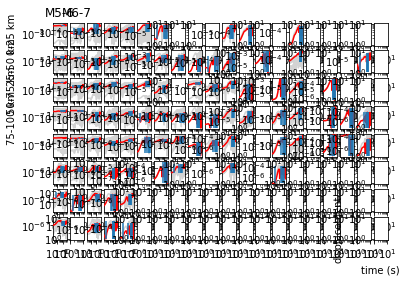

In [8]:
fig, axs = plt.subplots(8, df.shape[1]-1)
print('onto row/column plot')
row_count = 0
results = []
for row in range(8):
    #print('for row')
    col_count = 0
    for column in df.columns[:-1]:
        #print('for column')
        aad[column][row]=df[column][row]/counts[column][row]
        aad_bin = aad[column][row]
        # now to find where departure delay exceeds DPD
        # 'simple sequential computation ... comparing the amplitude at a sample
        # with the one at the previous sample ...regardless of the magntiude of the decline'
        # Noda and Ellsworth 2016
        DPD_time = 0.05
        DPD_samples = 2 # sampling rate is 50 Hz
        delay_time = []
        decline = 0 # count how many amplitudes have decreased in a row
        for point in range(1,len(aad_bin)):
            #print('for point in aad')
            if aad_bin[point]<aad_bin[point-1]:
                #print('less than previous point')
                decline += 1
                if decline == np.ceil(DPD_samples)-1: #if surpassed the DPD
                    delay_time.append(point)
            else:
                decline = 0 #reset decline counter
        T_dp = np.array(delay_time)/sampling_rate # convert to seconds
        if len(T_dp)>0:
            for i in range(0, min(5, len(T_dp))): # vertical lines marking potential Tdp locations (first 5 after P wave pick)
                axs[row_count][col_count].vlines(T_dp[i], min(aad_bin[0:250]), max(aad_bin[0:250]), zorder = 100)
            if float("{:.2f}".format(T_dp[0]))>0.05:
                print(column, row_count, T_dp[0])
                results.append([column, row_count, T_dp[0]])
            elif len(T_dp)>1:
                print(column, row_count, T_dp[1])
                results.append([column, row_count, T_dp[1]])
        axs[row_count][col_count].plot(np.arange(0, 5, 0.02), aad[column][row][:250], zorder = 50, color = 'red')
        for ind_ad in ad[column][row]:
            axs[row_count][col_count].plot(np.arange(0, 5, 0.02), ind_ad[:250], color='lightgrey')
        axs[row_count][col_count].set_xscale('log')
        axs[row_count][col_count].set_yscale('log') # in log space
        col_count += 1
    row_count += 1


axs[0][0].set_title('M5-6')
axs[0][1].set_title('M6-7')
axs[0][0].set_ylabel('0-25 km')
axs[1][0].set_ylabel('25-50 km')
axs[2][0].set_ylabel('50-75 km')
axs[3][0].set_ylabel('75-100 km')
plt.ylabel('displacement')
plt.xlabel('time (s)')
plt.show()

In [9]:
%%script false --no-raise-error
 
results = [['5.0', 0, 0.75],
 ['5.2', 0, 0.34999999999999998],
 ['5.3', 0, 0.5],
 ['5.4', 0, 0.75],
 ['5.5', 0, 0.59999999999999998],
 ['5.6', 0, 0.94999999999999996],
 ['6.0', 0, 0.59999999999999998],
 ['6.1', 0, 1.6000000000000001],
 ['6.4', 0, 1.3500000000000001],
 ['5.0', 1, 0.5],
 ['5.1', 1, 0.34999999999999998],
 ['5.2', 1, 0.55000000000000004],
 ['5.3', 1, 0.59999999999999998],
 ['5.4', 1, 0.69999999999999996],
 ['5.5', 1, 0.84999999999999998],
 ['5.6', 1, 0.45000000000000001],
 ['5.7', 1, 0.55000000000000004],
 ['5.8', 1, 1.0],
 ['5.9', 1, 1.1000000000000001],
 ['6.0', 1, 0.55000000000000004],
 ['6.2', 1, 0.59999999999999998],
 ['6.4', 1, 1.3999999999999999],
 ['6.8', 1, 1.2],
 ['5.0', 2, 0.5],
 ['5.1', 2, 0.45000000000000001],
 ['5.2', 2, 0.40000000000000002],
 ['5.3', 2, 0.55000000000000004],
 ['5.4', 2, 0.59999999999999998],
 ['5.5', 2, 0.55000000000000004],
 ['5.6', 2, 0.59999999999999998],
 ['5.8', 2, 0.55000000000000004],
 ['5.9', 2, 0.59999999999999998],
 ['6.0', 2, 1.3999999999999999],
 ['6.1', 2, 0.55000000000000004],
 ['6.3', 2, 1.1000000000000001],
 ['6.4', 2, 1.8],
 ['6.6', 2, 0.94999999999999996],
 ['5.0', 3, 0.5],
 ['5.1', 3, 0.55000000000000004],
 ['5.2', 3, 0.69999999999999996],
 ['5.3', 3, 0.55000000000000004],
 ['5.4', 3, 0.55000000000000004],
 ['5.5', 3, 0.55000000000000004],
 ['5.6', 3, 0.69999999999999996],
 ['5.7', 3, 0.59999999999999998],
 ['5.8', 3, 0.75],
 ['6.0', 3, 1.25],
 ['6.1', 3, 1.05],
 ['6.3', 3, 0.55000000000000004],
 ['6.4', 3, 1.1499999999999999],
 ['6.6', 3, 0.69999999999999996],
 ['6.7', 3, 1.1499999999999999],
 ['6.8', 3, 0.40000000000000002],
 ['5.0', 4, 0.55000000000000004],
 ['5.1', 4, 0.45000000000000001],
 ['5.2', 4, 0.59999999999999998],
 ['5.3', 4, 0.5],
 ['5.4', 4, 0.5],
 ['5.5', 4, 0.45000000000000001],
 ['5.6', 4, 0.5],
 ['5.7', 4, 0.59999999999999998],
 ['5.8', 4, 0.65000000000000002],
 ['5.9', 4, 0.59999999999999998],
 ['6.0', 4, 1.25],
 ['6.3', 4, 0.65000000000000002],
 ['6.4', 4, 1.3],
 ['6.6', 4, 0.34999999999999998],
 ['6.7', 4, 1.1499999999999999],
 ['6.8', 4, 1.3500000000000001],
 ['5.0', 5, 0.59999999999999998],
 ['5.1', 5, 0.59999999999999998],
 ['5.2', 5, 0.80000000000000004],
 ['5.3', 5, 0.80000000000000004],
 ['5.4', 5, 0.40000000000000002],
 ['5.6', 5, 0.75],
 ['5.7', 5, 0.55000000000000004],
 ['6.0', 5, 0.69999999999999996],
 ['6.3', 5, 0.69999999999999996],
 ['5.0', 6, 0.59999999999999998],
 ['5.1', 6, 0.75],
 ['5.2', 6, 0.94999999999999996],
 ['5.3', 6, 0.40000000000000002],
 ['5.4', 6, 0.65000000000000002],
 ['5.0', 7, 0.65000000000000002],
 ['5.2', 7, 0.55000000000000004],
 ['5.3', 7, 0.80000000000000004],
 ['5.4', 7, 0.45000000000000001]]

In [10]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def model_function(x_data, a, b):
    return a*x_data + b

In [11]:
all_mag = []

tdp_all = []
for i in results:
    all_mag.append(float(i[0]))
    tdp_all.append(float(i[2]))
y = all_mag
x = tdp_all    
x = np.array(x)

0.565549623897 5.91512162629
0.403710755883 -2.71832250978


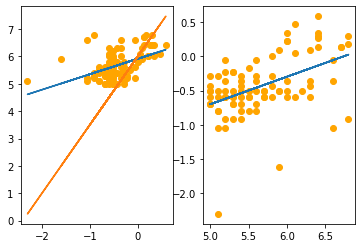

In [12]:
#%conda install ipympl
%matplotlib inline
fig, axs = plt.subplots(1,2)

#popt, pcov = curve_fit(model_function, np.log(np.array(tdp_all)), np.array(all_mag), absolute_sigma = True)
#axs[0].plot(np.log(tdp_all), model_function(np.log(tdp_all), *popt), color='orange')
#axs[0].scatter(np.log(tdp_all), all_mag)
#perr = np.sqrt(np.diag(pcov))
#print(popt, perr)

[a, b] = np.polyfit(x=np.log(np.array(tdp_all)), y=np.array(all_mag), deg=1)
axs[0].scatter(np.log(tdp_all), all_mag, color='orange')
axs[0].plot(np.log(np.array(tdp_all)), a*np.log(np.array(tdp_all))+b)
print(a,b)
axs[0].plot(np.log(np.array(tdp_all)), 2.5*np.log(np.array(tdp_all))+6)
#popt, pcov = curve_fit(model_function, np.array(all_mag), np.log(np.array(tdp_all)),absolute_sigma = True)
#axs[1].plot(np.array(all_mag), model_function(np.array(all_mag), *popt), color='orange')
#axs[1].scatter(all_mag, np.log(tdp_all))
#perr = np.sqrt(np.diag(pcov))
#print(popt, perr)

[a, b] = np.polyfit(x= np.array(all_mag), y=np.log(np.array(tdp_all)), deg=1)
axs[1].scatter(all_mag, np.log(tdp_all), color='orange')
axs[1].plot(np.array(all_mag), a*np.array(all_mag)+b)
print(a,b)
plt.show()

In [13]:
results

[['5.0', 0, 0.75],
 ['5.1', 0, 0.10000000000000001],
 ['5.2', 0, 0.34999999999999998],
 ['5.3', 0, 0.5],
 ['5.4', 0, 0.75],
 ['5.5', 0, 0.59999999999999998],
 ['5.6', 0, 0.94999999999999996],
 ['6.0', 0, 0.59999999999999998],
 ['6.1', 0, 1.6000000000000001],
 ['6.4', 0, 1.3500000000000001],
 ['5.0', 1, 0.5],
 ['5.1', 1, 0.34999999999999998],
 ['5.2', 1, 0.55000000000000004],
 ['5.3', 1, 0.59999999999999998],
 ['5.4', 1, 0.69999999999999996],
 ['5.5', 1, 0.84999999999999998],
 ['5.6', 1, 0.45000000000000001],
 ['5.7', 1, 0.55000000000000004],
 ['5.8', 1, 1.0],
 ['5.9', 1, 1.1000000000000001],
 ['6.0', 1, 0.55000000000000004],
 ['6.2', 1, 0.59999999999999998],
 ['6.4', 1, 1.3999999999999999],
 ['6.8', 1, 1.2],
 ['5.0', 2, 0.5],
 ['5.1', 2, 0.45000000000000001],
 ['5.2', 2, 0.40000000000000002],
 ['5.3', 2, 0.55000000000000004],
 ['5.4', 2, 0.59999999999999998],
 ['5.5', 2, 0.55000000000000004],
 ['5.6', 2, 0.59999999999999998],
 ['5.8', 2, 0.55000000000000004],
 ['5.9', 2, 0.599999999999

[ 0.56554962  5.91512163] [ 0.24132093  0.14800912]


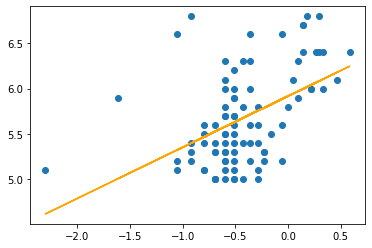

In [14]:
# plot line of best fit
popt, pcov = curve_fit(model_function, np.log(np.array(tdp_all)), np.array(all_mag), absolute_sigma = True)
plt.plot(np.log(tdp_all), model_function(np.log(tdp_all), *popt), color='orange')
plt.scatter(np.log(tdp_all), all_mag)

# add 2 * std banding
perr = np.sqrt(np.diag(pcov))
#x_me = np.arange(-10, 10, 0.1) #min(x), max(x), 0.1) #np.arange(5, 7, 0.1)
#x_me = np.log(x_me)
#x_lower_me = x_me - 2*perr[1]
#x_upper_me =  x_me + 2*perr[1]
#y_me = popt[0]*x_me+popt[1]
#y_lower_me = popt[0]*x_lower_me-popt[1]
#y_upper_me = popt[0]*x_upper_me-popt[1]
#axs[0].plot(x, y_me, color = '')
#plt.fill_between(x_me, model_function(np.array(x_lower_me), *popt), model_function(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
#plt.plot(x_me, model_function(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
#plt.plot(x_me, model_function(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
#plt.xlim([-1,1])
print(popt, perr)

In [15]:
print('mw='+str(popt[0])+'*log(Tdp) + ' + str(popt[1]))

mw=0.565549622535*log(Tdp) + 5.91512162585


In [16]:
popt

array([ 0.56554962,  5.91512163])

/tmp/ipykernel_1617372/73081361.py:12: RuntimeWarning: invalid value encountered in log
  x_me = np.log(x_me)
/tmp/ipykernel_1617372/73081361.py:13: RuntimeWarning: invalid value encountered in log
  x_upper_me = np.log(x_upper_me)
/tmp/ipykernel_1617372/73081361.py:14: RuntimeWarning: invalid value encountered in log
  x_lower_me = np.log(x_lower_me)


(-1.0, 1.0)

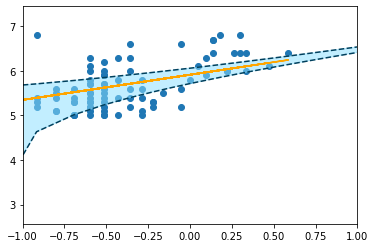

In [17]:
# plot line of best fit
popt, pcov = curve_fit(model_function, np.log(x), y, absolute_sigma = True)
plt.plot(np.log(x), model_function(np.log(x), *popt), color='orange')
plt.scatter(np.log(x), y)

# add 2 * std banding
perr = np.sqrt(np.diag(pcov))
x_me = np.arange(-10, 10, 0.1) #min(x), max(x), 0.1) #np.arange(5, 7, 0.1)

x_lower_me = x_me - 2*perr[1]
x_upper_me =  x_me + 2*perr[1]
x_me = np.log(x_me)
x_upper_me = np.log(x_upper_me)
x_lower_me = np.log(x_lower_me)
y_me = popt[0]*x_me+popt[1]
y_lower_me = popt[0]*x_lower_me-popt[1]
y_upper_me = popt[0]*x_upper_me-popt[1]

#axs[0].plot(x, y_me, color = '')
plt.fill_between(x_me, model_function(np.array(x_lower_me), *popt), model_function(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
plt.plot(x_me, model_function(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
plt.plot(x_me, model_function(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
plt.xlim([-1,1])

In [18]:
popt

array([ 0.56554962,  5.91512163])

In [19]:
results

[['5.0', 0, 0.75],
 ['5.1', 0, 0.10000000000000001],
 ['5.2', 0, 0.34999999999999998],
 ['5.3', 0, 0.5],
 ['5.4', 0, 0.75],
 ['5.5', 0, 0.59999999999999998],
 ['5.6', 0, 0.94999999999999996],
 ['6.0', 0, 0.59999999999999998],
 ['6.1', 0, 1.6000000000000001],
 ['6.4', 0, 1.3500000000000001],
 ['5.0', 1, 0.5],
 ['5.1', 1, 0.34999999999999998],
 ['5.2', 1, 0.55000000000000004],
 ['5.3', 1, 0.59999999999999998],
 ['5.4', 1, 0.69999999999999996],
 ['5.5', 1, 0.84999999999999998],
 ['5.6', 1, 0.45000000000000001],
 ['5.7', 1, 0.55000000000000004],
 ['5.8', 1, 1.0],
 ['5.9', 1, 1.1000000000000001],
 ['6.0', 1, 0.55000000000000004],
 ['6.2', 1, 0.59999999999999998],
 ['6.4', 1, 1.3999999999999999],
 ['6.8', 1, 1.2],
 ['5.0', 2, 0.5],
 ['5.1', 2, 0.45000000000000001],
 ['5.2', 2, 0.40000000000000002],
 ['5.3', 2, 0.55000000000000004],
 ['5.4', 2, 0.59999999999999998],
 ['5.5', 2, 0.55000000000000004],
 ['5.6', 2, 0.59999999999999998],
 ['5.8', 2, 0.55000000000000004],
 ['5.9', 2, 0.599999999999

In [20]:
all_mag = []

tdp_all = []
for i in results:
    all_mag.append(float(i[0]))
    tdp_all.append(float(i[2]))
x = np.array(all_mag)
y = tdp_all    
y = np.array(y)

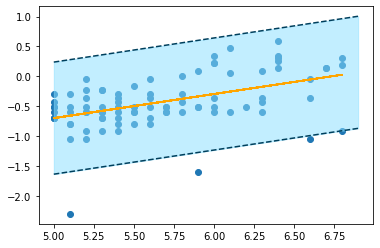

In [21]:
# plot line of best fit
popt, pcov = curve_fit(model_function, x, np.log(y), absolute_sigma = True)
plt.plot(x, model_function(x, *popt), color='orange')
plt.scatter(x, np.log(y))

# add 2 * std banding
perr = np.sqrt(np.diag(pcov))
x_me = np.arange(5, 7, 0.1)
#x_me = np.log(x_me)
x_lower_me = x_me - 2*perr[1]
x_upper_me =  x_me + 2*perr[1]
y_me = popt[0]*x_me+popt[1]
y_lower_me = popt[0]*x_lower_me-popt[1]
y_upper_me = popt[0]*x_upper_me-popt[1]
#axs[0].plot(x, y_me, color = '')
plt.fill_between(x_me, model_function(np.array(x_lower_me), *popt), model_function(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
plt.plot(x_me, model_function(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
plt.plot(x_me, model_function(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)


In [22]:
popt

array([ 0.40371075, -2.7183225 ])